# Taller Raíces
Gary Defas

26/10/2025


### Ejercicio 1
Para su resolución, se usó tanto los métodos de bisección como de Newton-Raphson.

Para sacar las primeras raíces se usó bisección, teniendo en cuenta que las raíces estaban en intervalos donde sus extremos tenían imágenes con diferente signo.

El que daba problemas fue la última raíz ubicada en un intervalo donde sus imágenes daban negativo, por lo que no se pudo aplicar bisección, sino Newton-Raphson

In [1]:
## CÓDIGO PARA VERIFICACIÓN DE RAÍCES
import scipy.optimize as opt

def f(x):
  return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def biseccion(a,b,n0=100000000,TOL = 10e-10):
  if f(a) * f(b) >= 0:
        print("Error: No hay cambio de signo en el intervalo [", a, ",", b, "]")
        return False

  i = 1
  FA = f(a)

  while i <= n0:
    p = a + (b-a)/2
    FP = f(p)

    if(FP == 0 or (b-a)/2 < TOL):
      print("El valor de x para que su imagen es cero es:",p)
      return True

    i = i + 1
    if FA*FP > 0:
      a = p
      FA = FP
    else:
      b = p
  return False


biseccion(-155, -140) ## Raíz 2: -152.0000000004511 = -152
biseccion(-140,-130) ## Raiz 2: -136.0000000000582 = -136

## Tercer Raíz sacada con el método Newton-Raphson
print("El valor de x para que su imagen sea cero es:",opt.newton(f,-120)) ## Raiz 3: -126


El valor de x para que su imagen es cero es: -151.99999999982538
El valor de x para que su imagen es cero es: -136.00000000034925
El valor de x para que su imagen sea cero es: -126.00000966998509


El valor de x para que su imagen es cero es: -151.9999999999891
El valor de x para que su imagen es cero es: -136.00000000013097
El valor de x para que su imagen es cero es: -126.00000966998509


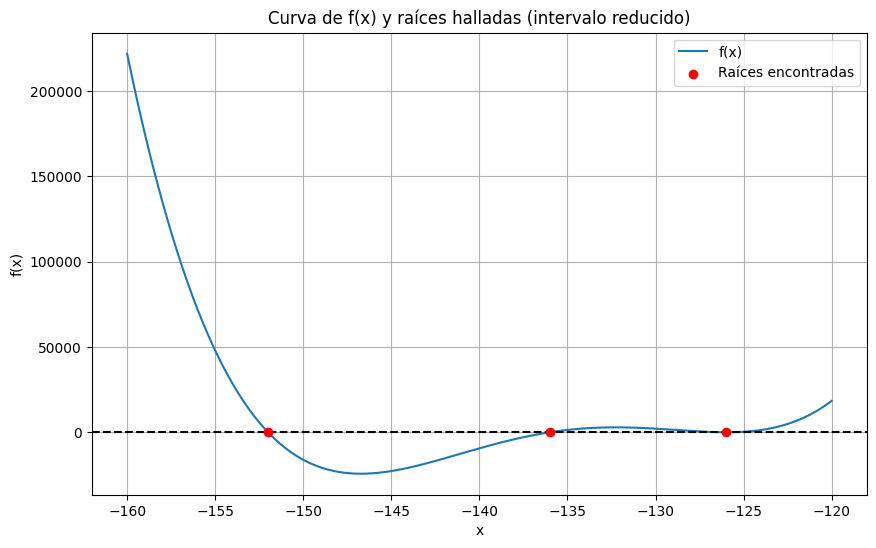


--- Bisección: Raíz cercana a -152 ---


In [ ]:
## CÓDIGO PARA IMPRIMIR IMÁGENES + ANIMACIÓN

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import ipywidgets as widgets
from IPython.display import display

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def biseccion(a,b,n0=1000,TOL=1e-10):

  pasos = []
  if f(a) * f(b) >= 0:
        print(f"Error: No hay cambio de signo en el intervalo [{a}, {b}]")
        return None, []

  i = 1
  FA = f(a)

  while i <= n0:
    p = a + (b-a)/2
    FP = f(p)
    pasos.append((a,b,p,FP))

    if(FP == 0 or (b-a)/2 < TOL):
      print("El valor de x para que su imagen es cero es:",p)
      return p, pasos

    i += 1
    if FA*FP > 0:
      a = p
      FA = FP
    else:
      b = p

  print("No se encontró raíz en el número máximo de iteraciones.")
  return None, pasos


#  Primera y segunda raices usando Método de Bisección ---
r1, pasos1 = biseccion(-155, -140)  # Raíz cercana a -152
r2, pasos2 = biseccion(-140,-130)   # Raíz cercana a -136

#  Tercera raíz usando Método de Newton
r3 = opt.newton(f, -120)
print(f"El valor de x para que su imagen es cero es: {r3}")

# --- Gráfica principal con raíces ---
x = np.linspace(-160, -120, 1000)
y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x)')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([r1, r2, r3], [0,0,0], color='red', zorder=5, label='Raíces encontradas')
plt.title('Curva de f(x) y raíces halladas (intervalo reducido)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# --- Visualización interactiva de la Bisección ---
def mostrar_iteracion(iteracion, pasos, titulo):
    a, b, p, FP = pasos[iteracion]
    x = np.linspace(a-2, b+2, 200)
    y = f(x)

    plt.figure(figsize=(9,6))
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linestyle='--')
    plt.plot(p, f(p), 'ro', label='Punto medio (p)')
    plt.axvline(a, color='green', linestyle='--', label='a')
    plt.axvline(b, color='orange', linestyle='--', label='b')
    plt.title(f"{titulo}\nIteración {iteracion+1}: a={a:.4f}, b={b:.4f}, p={p:.6f}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Slider interactivo para Bisección (Raíz 1) ---
print("\n--- Bisección: Raíz cercana a -152 ---")
widgets.interact(
    mostrar_iteracion,
    iteracion=widgets.IntSlider(min=0, max=len(pasos1)-1, step=1, value=0),
    pasos=widgets.fixed(pasos1),
    titulo=widgets.fixed("Método de Bisección — Raíz 1 (≈ -152)")
)

# --- Slider interactivo para Bisección (Raíz 2) ---
print("\n--- Bisección: Raíz cercana a -136 ---")
widgets.interact(
    mostrar_iteracion,
    iteracion=widgets.IntSlider(min=0, max=len(pasos2)-1, step=1, value=0),
    pasos=widgets.fixed(pasos2),
    titulo=widgets.fixed("Método de Bisección — Raíz 2 (≈ -136)")
)

# --- Visualización del resultado de Newton-Raphson ---
x_zoom = np.linspace(-130, -120, 300)
y_zoom = f(x_zoom)

plt.figure(figsize=(9,6))
plt.plot(x_zoom, y_zoom, label='f(x)')
plt.axhline(0, color='black', linestyle='--')
plt.plot(r3, 0, 'ro', label='Raíz Newton-Raphson (≈ -126)')
plt.title('Método de Newton-Raphson — Raíz cercana a -126')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 2

Reemplazando el valor de y = -2, la ecuación quedaría de la siguiente manera:

$$x^{2}+6x = 0$$

Se le puede resolver de manera analítica, teniendo como resultados:

$$x_1 = 0 ; x_2=-6$$

Usando métodos numéricos, se puede usar el siguiente código:

In [ ]:
import scipy.optimize as opt

def f(x):
  return x**2 + 6*x

print("El valor de x para que su imagen sea cero es:",opt.newton(f,-2)) ## x1=0
print("El valor de x para que su imagen sea cero es:",opt.newton(f,-5)) ## x2=-6

El valor de x para que su imagen sea cero es: -1.6781227193551881e-16
El valor de x para que su imagen sea cero es: -5.999999999999988


### Ejercicio 3